In [5]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


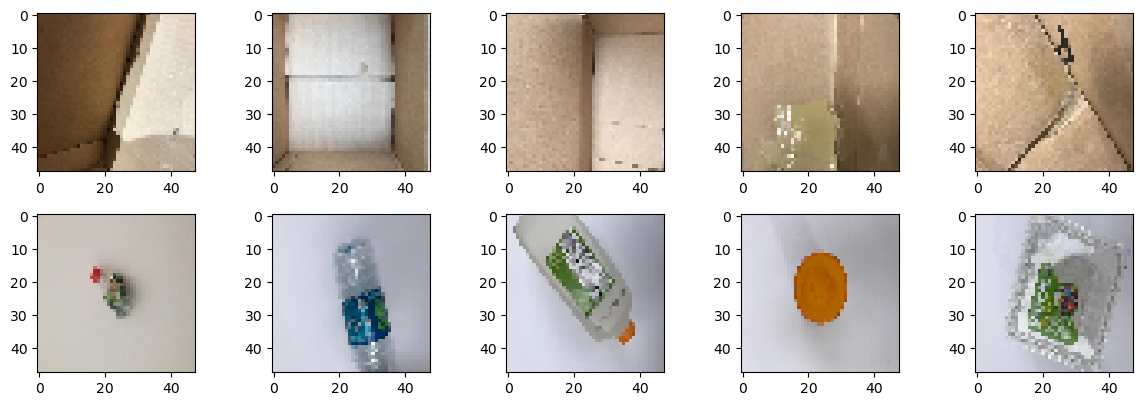

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "C:/Users/Dell/Desktop/dataset/"

plt.figure(0, figsize=(12,20))
cpt = 0

for person in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(10,5,cpt)
        img = load_img(base_path + "train/" + person + "/" +os.listdir(base_path + "train/" + person)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [7]:
for person in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + person))) + " " + person + " images")

1024 nonplastic images
482 plastic images


In [8]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "val",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
test_generator = datagen_test.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1506 images belonging to 2 classes.


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Dell/Desktop/dataset/val'

In [9]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

# number of possible label values
nb_classes = 10

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))
model.summary()


from keras.utils import plot_model 
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model1.png') 
import tensorflow as tf

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 128)     

In [10]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11221868052722645646
xla_global_id: -1
]
Device mapping: no known devices.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# Number of classes in your training data
num_classes = 2  # Update this to the correct number of classes

# Define the size of your images
pic_size = 224  # Update this to match the size of your images

# Define the batch size
batch_size = 32  # Update this according to your preference

# Define the base path for your data
base_path = "C:/Users/Dell/Desktop/dataset/"

# Define your model architecture
model = Sequential()
# Add layers to your model
model.add(Flatten(input_shape=(pic_size, pic_size, 3)))
# Add more layers if needed
model.add(Dense(num_classes, activation='softmax'))

# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Number of epochs to train the model
epochs = 50

# Path to save the best model weights
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Load and preprocess your training data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Set appropriate preprocessing steps

train_generator = train_datagen.flow_from_directory(
    base_path + "train/",
    target_size=(pic_size, pic_size),
    batch_size=batch_size,
    class_mode='categorical',  # Ensure one-hot encoding of labels
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_path + "train/",
    target_size=(pic_size, pic_size),
    batch_size=batch_size,
    class_mode='categorical',  # Ensure one-hot encoding of labels
    subset='validation'
)

# Fit the model using the generators
history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=callbacks_list
)

# Save the trained model
model.save("trained_model.h5")


Found 1206 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/50


C:\Users\Dell\AppData\Local\Temp\ipykernel_1816\3920584631.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


37/37 [==============================] - 4s 109ms/step - loss: 26.1199 - accuracy: 0.5801 - val_loss: 6.9154 - val_accuracy: 0.6528
Epoch 2/50
37/37 [==============================] - 4s 101ms/step - loss: 7.4095 - accuracy: 0.6005 - val_loss: 6.1804 - val_accuracy: 0.6806
Epoch 3/50
37/37 [==============================] - 4s 102ms/step - loss: 2.4819 - accuracy: 0.7087 - val_loss: 3.3742 - val_accuracy: 0.7049
Epoch 4/50
37/37 [==============================] - 4s 114ms/step - loss: 4.9293 - accuracy: 0.6261 - val_loss: 4.9148 - val_accuracy: 0.6944
Epoch 5/50
37/37 [==============================] - 4s 105ms/step - loss: 3.2130 - accuracy: 0.6823 - val_loss: 4.2832 - val_accuracy: 0.6979
Epoch 6/50
37/37 [==============================] - 4s 105ms/step - loss: 3.7748 - accuracy: 0.6661 - val_loss: 2.7122 - val_accuracy: 0.6979
Epoch 7/50
37/37 [==============================] - 4s 104ms/step - loss: 3.2028 - accuracy: 0.6797 - val_loss: 2.2205 - val_accuracy: 0.6840
Epoch 8/50
37/37

37/37 [==============================] - 4s 114ms/step - loss: 4.9321 - accuracy: 0.6857 - val_loss: 4.3534 - val_accuracy: 0.6146
Epoch 29/50
37/37 [==============================] - 4s 113ms/step - loss: 2.1188 - accuracy: 0.7564 - val_loss: 2.4854 - val_accuracy: 0.7257
Epoch 30/50
37/37 [==============================] - 4s 113ms/step - loss: 1.3275 - accuracy: 0.7930 - val_loss: 4.6002 - val_accuracy: 0.6771
Epoch 31/50
37/37 [==============================] - 4s 113ms/step - loss: 4.4618 - accuracy: 0.6780 - val_loss: 5.1690 - val_accuracy: 0.6007
Epoch 32/50
37/37 [==============================] - 4s 114ms/step - loss: 3.6392 - accuracy: 0.7121 - val_loss: 4.8588 - val_accuracy: 0.6458
Epoch 33/50
37/37 [==============================] - 4s 114ms/step - loss: 2.5325 - accuracy: 0.7436 - val_loss: 2.8633 - val_accuracy: 0.7083
Epoch 34/50
37/37 [==============================] - 4s 115ms/step - loss: 1.2569 - accuracy: 0.8083 - val_loss: 2.8242 - val_accuracy: 0.7118
Epoch 35/50

In [12]:
model.save("trained_model.h5")

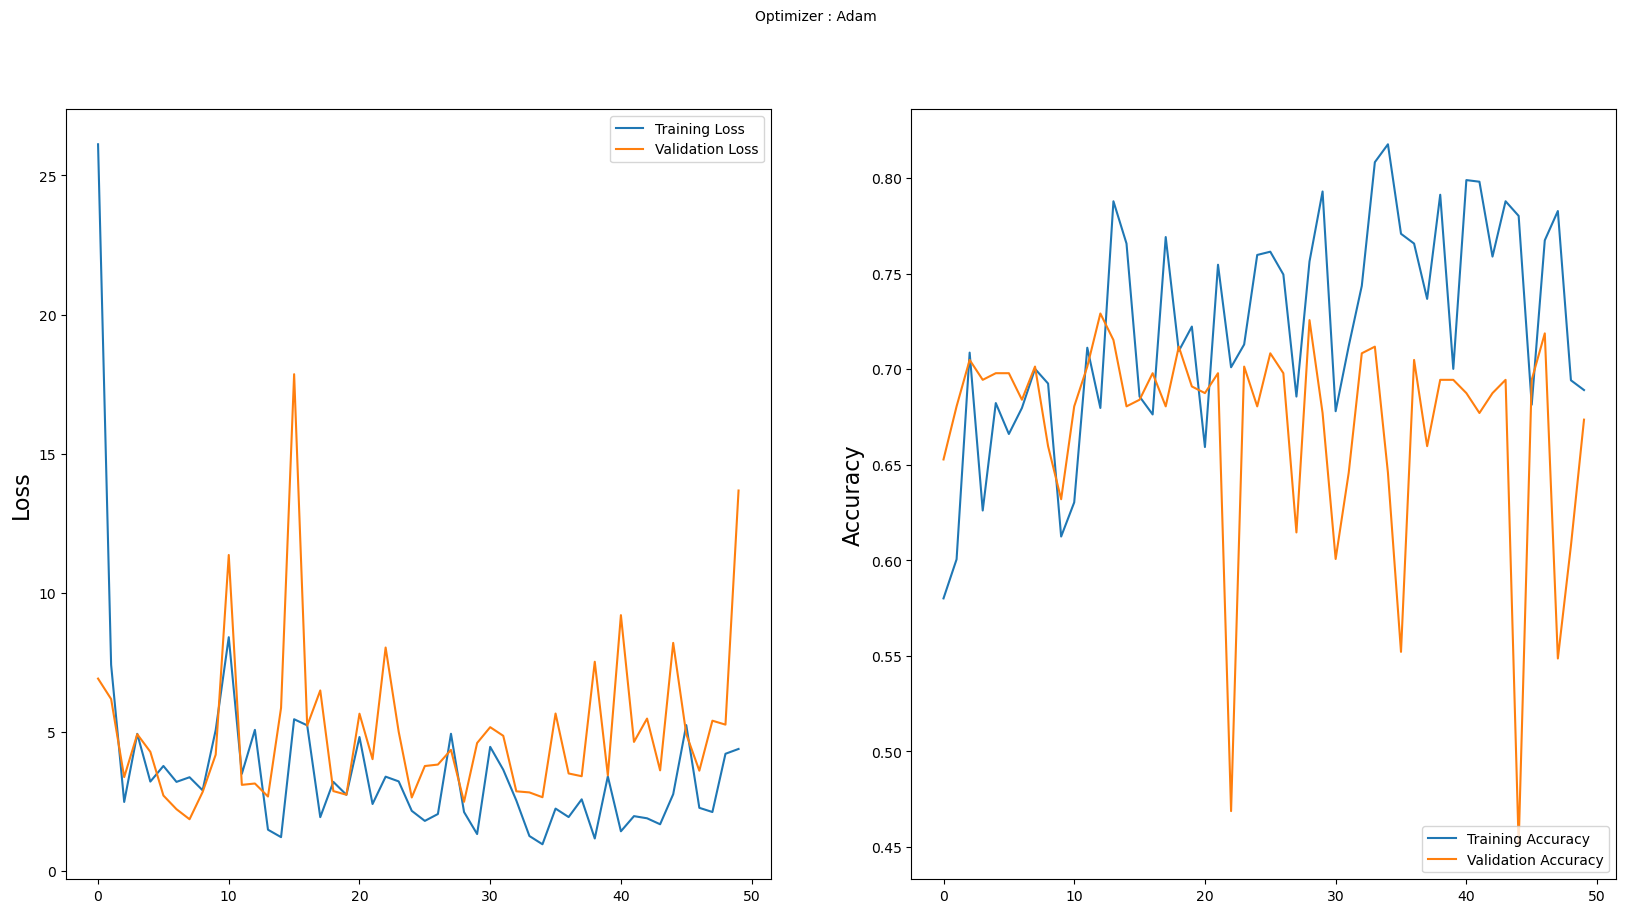

In [13]:
import matplotlib.pyplot as plt

 



plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Found 3695 images belonging to 2 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_1816\2087211705.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=test_generator)


TESTING ACCURACY: 76.67117726657645


<Figure size 640x480 with 0 Axes>

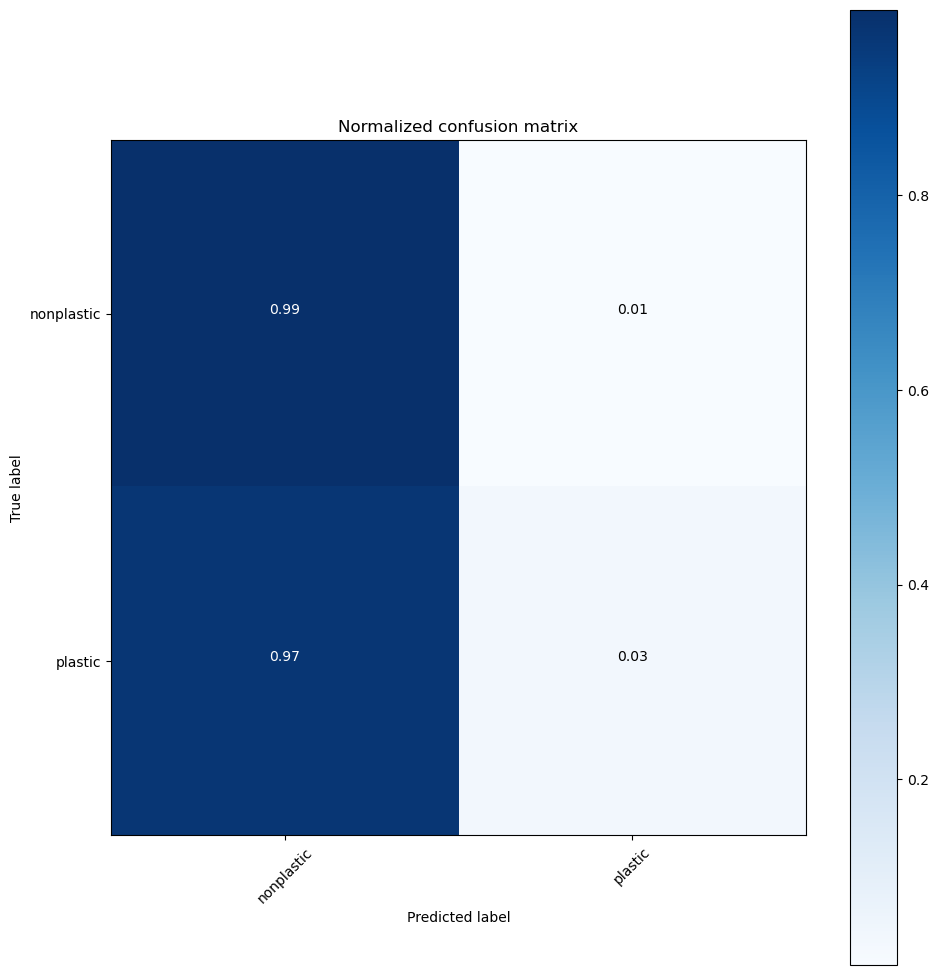

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model('trained_model.h5')

# Number of classes in your training data
num_classes = 2

# Load and preprocess your testing data using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    base_path + "test/",
    target_size=(pic_size, pic_size),
    batch_size=batch_size,
    class_mode='categorical',  # Ensure one-hot encoding of labels
    shuffle=False  # Make sure to set shuffle to False
)

# Check if there are any images in the test directory
if test_generator.samples == 0:
    print("No images found in the test directory.")
else:
    # Get predictions from the model
    predictions = model.predict_generator(generator=test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_test = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Compute accuracy
    testing_accuracy = accuracy_score(y_test, y_pred) * 100
    print("TESTING ACCURACY:", testing_accuracy)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
    plt.show()


In [15]:
from PIL import Image

# Path to the test image
test_image_path = "C:/Users/Dell/Desktop/test/plastic472.jpg"
test_image = Image.open(test_image_path).convert('RGB')
test_image = test_image.resize((pic_size, pic_size))
test_image = np.array(test_image)
test_image = test_image / 255.0  # Normalize the image

# Reshape the image array to match the expected input shape of the model
test_image = np.expand_dims(test_image, axis=0)

# Get the prediction for the test image
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)
class_label = class_names[predicted_class]
print("Predicted class:", class_label)


1/1 [==============================] - 0s 31ms/step
Predicted class: nonplastic


In [16]:
from PIL import Image

# Path to the test image
test_image_path = "C:/Users/Dell/Desktop/test/plastic-water-bottle.png"
test_image = Image.open(test_image_path).convert('RGB')
test_image = test_image.resize((pic_size, pic_size))
test_image = np.array(test_image)
test_image = test_image / 255.0  # Normalize the image

# Reshape the image array to match the expected input shape of the model
test_image = np.expand_dims(test_image, axis=0)

# Get the prediction for the test image
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)
class_label = class_names[predicted_class]
print("Predicted class:", class_label)


1/1 [==============================] - 0s 26ms/step
Predicted class: nonplastic


In [63]:
import cv2

# Initialize the camera
camera = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = camera.read()

    # Display the resulting frame
    cv2.imshow('Camera', frame)

    # Wait for key press
    key = cv2.waitKey(1)

    # Perform prediction when 's' key is pressed
    if key == ord('s'):
        # Preprocess the image
        resized_frame = cv2.resize(frame, (pic_size, pic_size))
        normalized_frame = resized_frame / 255.0
        test_image = np.expand_dims(normalized_frame, axis=0)

        # Get the prediction for the test image
        prediction = model.predict(test_image)
        predicted_class = np.argmax(prediction)
        class_label = class_names[predicted_class]
        print("Predicted class:", class_label)

    # Break the loop when 'q' key is pressed
    if key == ord('p'):
        break

# Release the camera
camera.release()

# Close all windows
cv2.destroyAllWindows()


1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: nonplastic
1/1 [==============================] - 0s 16ms/step
Predicted class: nonplastic
1/1 [==============================] - 0s 31ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 17ms/step
Predicted class: plastic
1/1 [==============================] - 0s 31ms/step
Predicted class: nonplastic
1/1 [==============================] - 0s 16ms/step
Predicted class: nonplastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: nonplastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted

In [71]:
import cv2
import serial
import time
# Serial communication setup
ser = serial.Serial('COM3', 9600)  # 'COM3' serial port name
time.sleep(2)

# Initialize the camera
camera = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = camera.read()

    # Display the resulting frame
    cv2.imshow('Camera', frame)

    # Wait for key press
    key = cv2.waitKey(1)

    # Perform prediction when 's' key is pressed
    if key == ord('s'):
        # Preprocess the image
        resized_frame = cv2.resize(frame, (pic_size, pic_size))
        normalized_frame = resized_frame / 255.0
        test_image = np.expand_dims(normalized_frame, axis=0)

        # Get the prediction for the test image
        prediction = model.predict(test_image)
        predicted_class = np.argmax(prediction)
        class_label = class_names[predicted_class]
        print("Predicted class:", class_label)
        if class_label == 'plastic':
            command = '1'
            ser.write(command.encode())
        elif class_label == 'nonplastic':
            command = '2'
            ser.write(command.encode())
        else:
            command = '0'
            ser.write(command.encode())

    # Break the loop when 'q' key is pressed
    if key == ord('p'):
        break

# Release the camera
camera.release()

# Close all windows
cv2.destroyAllWindows()


1/1 [==============================] - 0s 47ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 23ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 18ms/step
Predicted class: nonplastic
1/1 [==============================] - 0s 21ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 32ms/step
Predicted class: nonplastic
1/1 [==============================] - 0s 16ms/step
Predicted class: plastic
1/1 [==============================] - 0s 16ms/step
Predicted class: p

#include <VarSpeedServo.h>
VarSpeedServo myservo1;
VarSpeedServo myservo2;
const int servoPin1 = 9; // the digital pin used for the first servo
const int servoPin2 = 10; // the digital pin used for the second servo
const int inputPin = 2;

int ledPin = 13;  // LED connected to digital pin 13

void setup() {
   Serial.begin(9600);
   pinMode(inputPin, INPUT);
  pinMode(ledPin, OUTPUT);
  myservo1.attach(servoPin1);  // attaches the servo on pin 9 to the servo object
  myservo1.write(0,255,false); // set the intial position of the servo, as fast as possible, run in background
  myservo2.attach(servoPin2);  // attaches the servo on pin 9 to the servo object
  myservo2.write(0,255,true);  // set the intial position of the servo, as fast as possible, wait until done
  delay(15); // Delay to allow the servo to reach the desired position

}

void loop() {
  int state = digitalRead(inputPin);
  Serial.println(state);
  delay(100);
  if (Serial.available() > 0) {
    char command = Serial.read();
    if (command == '1') {
      digitalWrite(ledPin, HIGH);
      myservo1.write(180,200,true); // set the intial position of the servo, as fast as possible, run in background
      delay(500);
       myservo2.write(90,255,true);  // set the intial position of the servo, as fast as possible, wait until done
      delay(15); // Delay to allow the servo to reach the desired position
  
    } else if (command == '0') {
      digitalWrite(ledPin, LOW);
      
       myservo2.write(0,255,true);  // set the intial position of the servo, as fast as possible, run in background
      delay(15); // Delay to allow the servo to reach the desired position
  
    } else if (command == '2') {
      digitalWrite(ledPin, LOW);
      myservo1.write(0,200,true); // set the intial position of the servo, as fast as possible, wait until done
       myservo2.write(90,255,false);  // set the intial position of the servo, as fast as possible, run in background
      delay(15); // Delay to allow the servo to reach the desired position
  
    }
  }
}

In [ ]:
import cv2
import serial
import time
# Serial communication setup
ser = serial.Serial('COM3', 9600)  # 'COM3' serial port name
time.sleep(2)

# Initialize the camera
camera = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = camera.read()

    # Display the resulting frame
    cv2.imshow('Camera', frame)

    # Wait for key press
    key = cv2.waitKey(1)
    data = ser.readline().decode().strip()
    if data:
        digital_input = int(data)
        print("Digital Input:", digital_input)
    # Perform prediction when 's' key is pressed
    if digital_input == '1':
        # Preprocess the image
        resized_frame = cv2.resize(frame, (pic_size, pic_size))
        normalized_frame = resized_frame / 255.0
        test_image = np.expand_dims(normalized_frame, axis=0)

        # Get the prediction for the test image
        prediction = model.predict(test_image)
        predicted_class = np.argmax(prediction)
        class_label = class_names[predicted_class]
        print("Predicted class:", class_label)
        if class_label == 'plastic':
            command = '1'
            ser.write(command.encode())
        elif class_label == 'nonplastic':
            command = '2'
            ser.write(command.encode())
        else:
            command = '0'
            ser.write(command.encode())
    else:
            command = '0'
            ser.write(command.encode())       

    # Break the loop when 'q' key is pressed
    if key == ord('p'):
        break

# Release the camera
camera.release()

# Close all windows
cv2.destroyAllWindows()


In [ ]:
import cv2
import serial
import time

# Serial communication setup
ser = serial.Serial('COM3', 9600)  # 'COM3' serial port name
time.sleep(1000)

# Initialize the camera
camera = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = camera.read()

    # Display the resulting frame
    cv2.imshow('Camera', frame)

    # Wait for key press
    key = cv2.waitKey(1)
    data = ser.readline().decode().strip()
    if data:
        digital_input = int(data)
        print("Digital Input:", digital_input)
    
    # Perform prediction when digital input is 1
    if digital_input == 1:
        # Preprocess the image
        resized_frame = cv2.resize(frame, (pic_size, pic_size))
        normalized_frame = resized_frame / 255.0
        test_image = np.expand_dims(normalized_frame, axis=0)

        # Get the prediction for the test image
        prediction = model.predict(test_image)
        predicted_class = np.argmax(prediction)
        class_label = class_names[predicted_class]
        print("Predicted class:", class_label)
        
        if class_label == 'plastic':
            command = '1'
            ser.write(command.encode())
        elif class_label == 'nonplastic':
            command = '2'
            ser.write(command.encode())
        else:
            command = '0'
            ser.write(command.encode())
    elif digital_input == 0:
        command = '0'
        ser.write(command.encode())       
    else:
        command = '0'
        ser.write(command.encode())
    # Break the loop when 'p' key is pressed
    if key == ord('p'):
        break

# Release the camera
camera.release()

# Close all windows
cv2.destroyAllWindows()
